## Assignment 4 - Web and API
INST447-ESG1 Spring 2021 - Farmer<br>
Zachary Foss

Resources:<br>
- https://api.stackexchange.com/docs
- https://api.stackexchange.com/docs/tags-by-name
- https://requests.readthedocs.io/en/master/


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize #special package in pandas
import json
%matplotlib inline

In [2]:
# Step - 1
# use the stackexchange API for pandas across the three sites (stack, stat, DataScience)
#     You will need to do the same thing for 'R'....so you will have a total of 6 requests.

stackPandasRequest = requests.get('https://api.stackexchange.com/tags/pandas/info?site=stackoverflow.com') 
statsPandasRequest = requests.get('https://api.stackexchange.com/tags/pandas/info?site=stats.stackexchange.com') 
dataSciencePandasRequest = requests.get('https://api.stackexchange.com/tags/pandas/info?site=datascience.stackexchange.com')
# You need to do the same for R  
stackRRequest = requests.get('https://api.stackexchange.com/tags/R/info?site=stackoverflow.com') 
statsRRequest = requests.get('https://api.stackexchange.com/tags/R/info?site=stats.stackexchange.com') 
dataScienceRRequest = requests.get('https://api.stackexchange.com/tags/R/info?site=datascience.stackexchange.com')
# Print out status code, headers, encoding
print(stackPandasRequest.status_code, stackPandasRequest.headers, stackPandasRequest.encoding)
print(statsPandasRequest.status_code, statsPandasRequest.headers, statsPandasRequest.encoding) 
print(dataSciencePandasRequest.status_code, dataSciencePandasRequest.headers, dataSciencePandasRequest.encoding) 
print(stackRRequest.status_code, stackRRequest.headers, stackRRequest.encoding) 
print(statsRRequest.status_code, statsRRequest.headers, statsRRequest.encoding)
print(dataScienceRRequest.status_code, dataScienceRRequest.headers, dataScienceRRequest.encoding)  


200 {'cache-control': 'private', 'content-length': '145', 'content-type': 'application/json; charset=utf-8', 'content-encoding': 'gzip', 'strict-transport-security': 'max-age=15552000', 'access-control-allow-origin': '*', 'access-control-allow-methods': 'GET, POST', 'access-control-allow-credentials': 'false', 'x-content-type-options': 'nosniff', 'x-request-guid': 'dc798106-f582-4122-9f93-58a146bf4f50', 'set-cookie': 'prov=e511e8b5-69d9-4e40-9205-ba1a315c8b33; expires=Fri, 01 Jan 2055 00:00:00 GMT; domain=.stackexchange.com; path=/; secure; samesite=none; httponly', 'content-security-policy': "upgrade-insecure-requests; frame-ancestors 'self' https://stackexchange.com", 'date': 'Sun, 09 May 2021 17:00:46 GMT'} utf-8
200 {'cache-control': 'private', 'content-length': '144', 'content-type': 'application/json; charset=utf-8', 'content-encoding': 'gzip', 'strict-transport-security': 'max-age=15552000', 'access-control-allow-origin': '*', 'access-control-allow-methods': 'GET, POST', 'access

In [3]:
# Step - 2
# Save the text output from each and print
text_file = open("stackexchange.json", "w")

text_file.write(stackPandasRequest.text)

text_file.close()
text_file = open("stackexchange.json", "a")

text_file.write(statsPandasRequest.text)

text_file.close()
text_file = open("stackexchange.json", "a")

text_file.write(dataSciencePandasRequest.text)

text_file.close()
text_file = open("stackexchange.json", "a")

text_file.write(stackRRequest.text)

text_file.close()
text_file = open("stackexchange.json", "a")

text_file.write(statsRRequest.text)

text_file.close()
text_file = open("stackexchange.json", "a")

text_file.write(dataScienceRRequest.text)

text_file.close()

text_file = open("stackexchange.json", "r")
print(text_file.read())

#create a json object for each of the 'pandas' requests and for the 'R' requests
stackRequestJson = json.loads(stackPandasRequest.text)
statRequestJson = json.loads(statsPandasRequest.text)
dataSciencePandas = json.loads(dataSciencePandasRequest.text)

# R...
stackRJson = json.loads(stackRRequest.text)
statRJson = json.loads(statsRRequest.text)
dataScienceRJson = json.loads(dataScienceRRequest.text)

{"items":[{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":200030,"name":"pandas"}],"has_more":false,"quota_max":300,"quota_remaining":299}{"items":[{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":130,"name":"pandas"}],"has_more":false,"quota_max":300,"quota_remaining":299}{"items":[{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":1031,"name":"pandas"}],"has_more":false,"quota_max":300,"quota_remaining":298}{"items":[{"has_synonyms":true,"is_moderator_only":false,"is_required":false,"count":401014,"name":"r"}],"has_more":false,"quota_max":300,"quota_remaining":298}{"items":[{"has_synonyms":true,"is_moderator_only":false,"is_required":false,"count":25255,"name":"r"}],"has_more":false,"quota_max":300,"quota_remaining":298}{"items":[{"has_synonyms":false,"is_moderator_only":false,"is_required":false,"count":1293,"name":"r"}],"has_more":false,"quota_max":300,"quota_remaining":298}


In [4]:
# Step 2 continued...

# print the json objects for pandas, make sure to set an indentation of 4 and sort the keys - this can
#    be done in the 'json.dumps' method
stackP = json.dumps(stackRequestJson, indent = 4, sort_keys=True)
print(stackP)
statsP = json.dumps(statRequestJson, indent = 4, sort_keys=True)
print(statsP)
dataScienceP = json.dumps(dataSciencePandas, indent = 4, sort_keys=True)
print(dataScienceP)

# Debugging help
# print(stack...Request.text)
# print(stack...Request.json())
# print(json.dumps(stack...RequestJson...)


{
    "has_more": false,
    "items": [
        {
            "count": 200030,
            "has_synonyms": false,
            "is_moderator_only": false,
            "is_required": false,
            "name": "pandas"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 299
}
{
    "has_more": false,
    "items": [
        {
            "count": 130,
            "has_synonyms": false,
            "is_moderator_only": false,
            "is_required": false,
            "name": "pandas"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 299
}
{
    "has_more": false,
    "items": [
        {
            "count": 1031,
            "has_synonyms": false,
            "is_moderator_only": false,
            "is_required": false,
            "name": "pandas"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 298
}


In [5]:
# Step 2 continued...

# print the json objects for R, make sure to set an indentation of 4 and sort the keys - this can
#    be done in the 'json.dumps' method
stackR = json.dumps(stackRJson, indent = 4, sort_keys=True)
print(stackR)
statsR = json.dumps(statRJson, indent = 4, sort_keys=True)
print(statsR)
dataScienceR = json.dumps(dataScienceRJson, indent = 4, sort_keys=True)
print(dataScienceR)


# Debugging help
# print(stack...Request.text)
# print(stack...Request.json())
# print(json.dumps(stack...RequestJson...)


{
    "has_more": false,
    "items": [
        {
            "count": 401014,
            "has_synonyms": true,
            "is_moderator_only": false,
            "is_required": false,
            "name": "r"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 298
}
{
    "has_more": false,
    "items": [
        {
            "count": 25255,
            "has_synonyms": true,
            "is_moderator_only": false,
            "is_required": false,
            "name": "r"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 298
}
{
    "has_more": false,
    "items": [
        {
            "count": 1293,
            "has_synonyms": false,
            "is_moderator_only": false,
            "is_required": false,
            "name": "r"
        }
    ],
    "quota_max": 300,
    "quota_remaining": 298
}


In [6]:
# Step - 3
# flatten json into a data frame for each and add the 'Site' and 'Tag' used
stackRequest_df = pd.json_normalize(stackRequestJson['items'])
stackRequest_df["Site"] = "Stack"
stackRequest_df["Tag"] = "Pandas"
# count the number of rows
print(stackRequest_df.shape)

# print first few rows
stackRequest_df.head()

# do the other Pandas and all of the R ones as well
statsRequest_df = pd.json_normalize(statRequestJson['items'])
statsRequest_df["Site"] = "Stats"
statsRequest_df["Tag"] = "Pandas"
# count the number of rows
print(statsRequest_df.shape)

# print first few rows
statsRequest_df.head()

dataSciencePRequest_df = pd.json_normalize(dataSciencePandas['items'])
dataSciencePRequest_df["Site"] = "Data Science"
dataSciencePRequest_df["Tag"] = "Pandas"
# count the number of rows
print(dataSciencePRequest_df.shape)

# print first few rows
dataSciencePRequest_df.head()

###### R 
stackRRequest_df = pd.json_normalize(stackRJson['items'])
stackRRequest_df["Site"] = "Stack"
stackRRequest_df["Tag"] = "R"
# count the number of rows
print(stackRRequest_df.shape)

# print first few rows
stackRRequest_df.head()

statsRRequest_df = pd.json_normalize(statRJson['items'])
statsRRequest_df["Site"] = "Stats"
statsRRequest_df["Tag"] = "R"
# count the number of rows
print(statsRRequest_df.shape)

# print first few rows
statsRRequest_df.head()

dataScienceRRequest_df = pd.json_normalize(dataScienceRJson['items'])
dataScienceRRequest_df["Site"] = "Data Science"
dataScienceRRequest_df["Tag"] = "R"
# count the number of rows
print(dataScienceRRequest_df.shape)

# print first few rows
dataScienceRRequest_df.head()

(1, 7)
(1, 7)
(1, 7)
(1, 7)
(1, 7)
(1, 7)


,has_synonyms,is_moderator_only,is_required,count,name,Site,Tag
0,False,False,False,1293,r,Data Science,R


   has_synonyms  is_moderator_only  is_required   count    name          Site  \
0         False              False        False  200030  pandas         Stack   
1         False              False        False     130  pandas         Stats   
2         False              False        False    1031  pandas  Data Science   
3          True              False        False  401014       r         Stack   
4          True              False        False   25255       r         Stats   
5         False              False        False    1293       r  Data Science   

      Tag  
0  Pandas  
1  Pandas  
2  Pandas  
3       R  
4       R  
5       R  


<AxesSubplot:xlabel='Site', ylabel='count'>

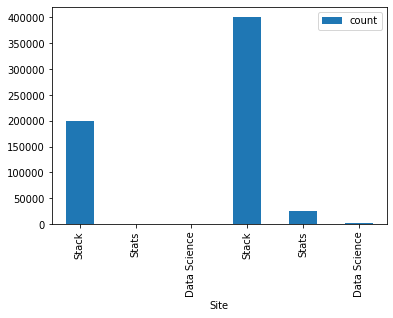

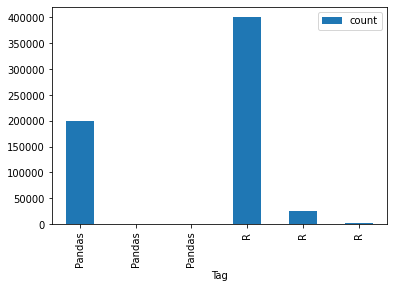

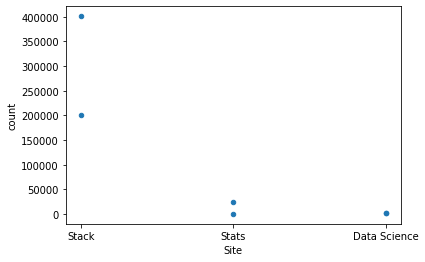

In [7]:
# Additional steps, downloads, concat dataframes, graphs......anything you would need to tell the story
#. e.g. concat the dataframes together
dataframes = [stackRequest_df, statsRequest_df, dataSciencePRequest_df, stackRRequest_df, statsRRequest_df, dataScienceRRequest_df]

finalFrame = pd.concat(dataframes, sort=False)
finalFrame.reset_index(drop=True, inplace=True)
print(finalFrame)
#.   create a barchart showing the differences between Pandas and R total
finalFrame.plot.bar(x="Site", y="count")
finalFrame.plot.bar(x="Tag", y="count")
#.   plot the number of posts per site for Pandas and R
finalFrame.plot(x="Site", y="count", kind='scatter')

# Give an explanation of the results and what they mean in terms of the research question

The results clearly show that the more popular data science tool is R. The number of questions about R on stack overflow were nearly double the number of questions about Pandas. This contnues for the other two categories as well. 

#  Give a take-away message which succinctly makes it clear what was found and why it matters

I would take away from this that although pandas are an incredibly useful tool they are not the only tool to use. For people who would like to pursue a career in data science it is clear that learning R is probably the better option than Pandas as R is more popular. It is a good thing to know both but overall I believe from these results we can conclude that it is more likely that any given company is using R instead of Pandas.

#  Give a note about the limitations of the data or analysis

However, This data is incredibly limited. We only looked at 3 sub communities of data analysis/programming that exist on the internet. The internet is filled with hundred upon thousands of sub communities across multiple sites such as Twitter, Reddit, LinkedIn, Youtube, etc. Using this data and making claims as factual knowledge would be very irresponsible considering the small sample size makes the data look incredibly skewed in one direction. I would recommend looking at Reddit and Youtube before another analysis and then possibly moving to even more sites. 